In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
### Config
MEAN_CHORD      = 250           * 1e-3  # mm
WINGSPAN        = 1400          * 1e-3  # mm
WING_AREA       = WINGSPAN*MEAN_CHORD
ASPECT_RATIO    = WINGSPAN/MEAN_CHORD

In [3]:
### Tail config
lt              = 650           * 1e-3  # mm
tail_chord      = 150           * 1e-3  # mm
tail_span       = 300           * 1e-3  # mm
tail_area       = tail_chord*tail_span  # m**2

hac = 62.5                      * 1e-3  # mm
hcg = 187.5                     * 1e-3  # mm

_,_,cl_t,cd_t,cm_t = np.load('naca9.npy',allow_pickle=True)
alpha,_,cl_w,cd_w,cm_w = np.load('..\\Aerodynamics\\tkv2008_analysis_3.npy',allow_pickle=True)

cl_w = cl_w[:,15]
cd_w = cd_w[:,15]
cm_w = cm_w[:,15]
cl_t = cl_t.flatten()
cd_t = cd_t.flatten()
cm_t = cm_t.flatten()

index_alpha_stall = np.nanargmax(cl_w)
index_alpha_0 = np.nanargmin(np.abs(alpha))
index_cl_0_tail = np.nanargmin(np.abs(cl_t))
index_cl_0_wing = np.nanargmin(np.abs(cl_w))
index_cl_max_tail = np.nanargmax(cl_t[:-20])
index_cl_max_wing = np.nanargmax(cl_w)
cl_alpha_tail = (cl_t[index_cl_max_tail]-cl_t[index_cl_0_tail])/(alpha[index_cl_max_tail]-alpha[index_cl_0_tail])
cl_alpha_wing = (cl_w[index_cl_max_wing]-cl_w[index_cl_0_wing])/(alpha[index_cl_max_wing]-alpha[index_cl_0_wing])

# cl_w_linear = cl_w[index_alpha_0]+(alpha)*cl_alpha_wing
# cl_t_linear = cl_t[index_alpha_0]+(alpha-alpha[index_cl_0_tail])*cl_alpha_tail
cl_w_linear = (alpha-alpha[index_cl_0_wing])*cl_alpha_wing
cl_t_linear = (alpha-alpha[index_cl_0_tail])*cl_alpha_tail

CL_alpha_tail = cl_alpha_tail*0.9 
CL_alpha_wing = cl_alpha_wing*0.9
CL_w_linear = (alpha-alpha[index_cl_0_wing])*CL_alpha_wing
CL_t_linear = (alpha-alpha[index_cl_0_tail])*CL_alpha_tail

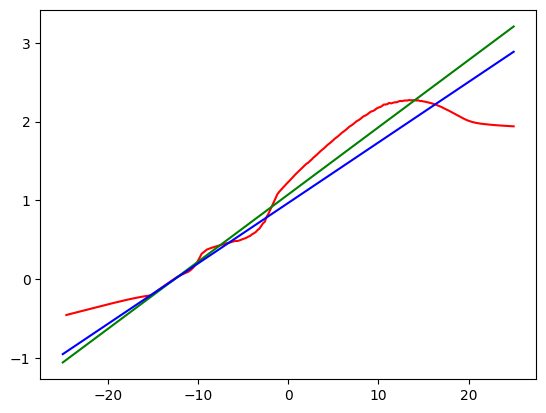

In [4]:
plt.plot(alpha,cl_w,'r')
plt.plot(alpha,cl_w_linear,'g')
plt.plot(alpha,CL_w_linear,'b')

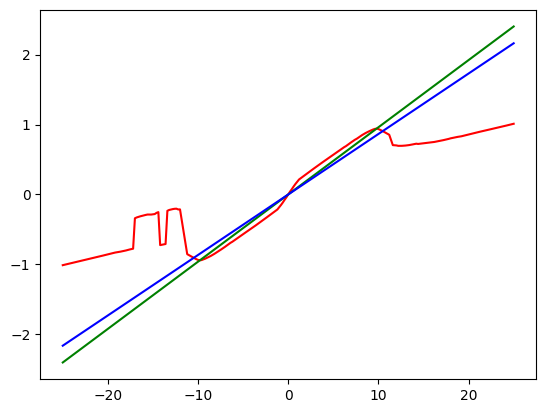

In [5]:
plt.plot(alpha,cl_t,'r')
plt.plot(alpha,cl_t_linear,'g')
plt.plot(alpha,CL_t_linear,'b')

In [7]:
CM_cg_w = cm_w + CL_w_linear * (hcg/MEAN_CHORD - hac/MEAN_CHORD)

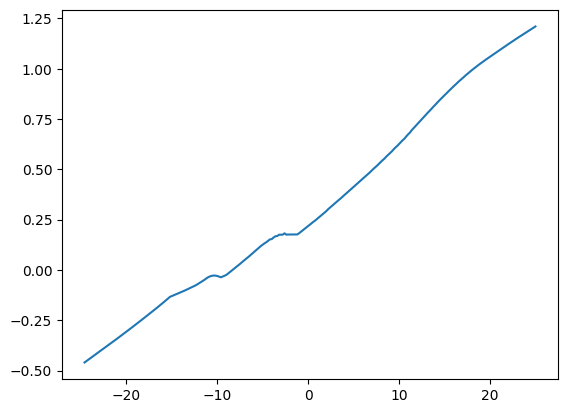

In [8]:
plt.plot(alpha,CM_cg_w)
# plt.vlines(alpha[index_alpha_stall],ymin=0,ymax=1,colors='black')

In [9]:
tail_volume = lt*tail_area/WING_AREA/MEAN_CHORD
tail_volume

0.33428571428571424

In [19]:
iw = 0
it = 0
tail_efficiency = 0.9

In [13]:
downwash = 2*CL_w_linear/np.pi/ASPECT_RATIO*180/np.pi
downwash_prime = np.zeros(len(alpha))
downwash_prime[:-1] = downwash[1:]-downwash[:-1] 

In [26]:
downwash0 = downwash[np.nanargmin(np.abs(alpha))]
downwash_alpha = 2*cl_alpha_tail/np.pi/ASPECT_RATIO*180/np.pi

In [24]:
CM_0_t = tail_efficiency * tail_volume * CL_t_linear[np.nanargmin(np.abs(alpha-(downwash0+iw-it)))]

In [33]:
CM_alpha_t = - tail_efficiency * tail_volume * cl_t_linear[np.nanargmin(np.abs(alpha-(1-downwash_alpha)))]

In [35]:
CM_cg_t = CM_0_t + alpha*CM_alpha_t

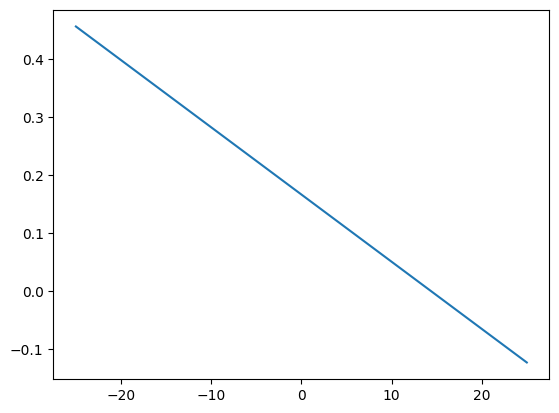

In [38]:
plt.plot(alpha,CM_cg_t)

In [9]:
angle_cl = (downwash[index_alpha_0]+iw-it) 
clat = np.nanargmin(alpha-angle_cl) 
cl_t_linear[clat] 

-2.4028061224489794

In [ ]:
CM_cg_t = -tail_volume * CL_t_linear * tail_efficiency

env 

In [2]:
env = [
    25.98,
    25.98,
    25,
    25,
    21.98,
    23.33,
    36.09
]
cr = [
    4.17,
    4.17,
    4.27,
    4.27,
    2.53,
    3.77,
    4.17
]
ct = [
    3.35,
    3.35,
    2.13,
    2.13,
    2.53,
    2.36,
    2.75
]
lh = [
    9.71,
    9.71,
    9.71,
    9.71,
    0,
    8.83,
    0
]
lv = [
    10.53,
    10.53,
    10.6,
    10.6,
    0,
    8.5,
    0
]
b_bh = [
    3.25,
    3.25,
    3.26,
    3.26,
    0,
    3.86,
    0
]
s = [
    94.94,
    94.94,
    79.97,
    79.97,
    55.97,
    88.05,
    124.86
]
sv = [
    12.06,
    12.06,
    6.78,
    6.78,
    0,
    6.75,
    0
]
sh = [
    22.07,
    22.07,
    14.85,
    14.85,
    0,
    21.53,
    0
]

In [4]:
import numpy as np

In [6]:
lh = np.array(lh)
lv = np.array(lv)
sw = np.array(s)
sv = np.array(sv)
sh = np.array(sh)
cm = (np.array(cr)+np.array(ct))/2



In [9]:
vh = lh*sh/sw/cm
vh

array([0.60032232, 0.60032232, 0.56346716, 0.56346716, 0.        ,
       0.70444144, 0.        ])

In [11]:
vv = lv*sv/sw/cm
vv

array([0.35574484, 0.35574484, 0.28083969, 0.28083969, 0.        ,
       0.2125998 , 0.        ])